In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow
from tensorflow.keras.applications import VGG16

In [ ]:
# !unzip -u '/content/drive/MyDrive/cell_images.zip' -d '/content/drive/MyDrive/cell_images'

In [ ]:
train = '/content/drive/MyDrive/cell_images/cell_images/train'
test = '/content/drive/MyDrive/cell_images/cell_images/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(train,target_size=(130,130),batch_size=32,class_mode='binary')
testing_set=test_datagen.flow_from_directory(test,target_size=(130,130),batch_size=12,class_mode='binary')

Found 34902 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [ ]:
basic_vgg = VGG16(input_shape=(130,130,3),
                 include_top=False,
                 weights='imagenet')
for layer in basic_vgg.layers:
    layer.trainable = False

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sample_img = os.listdir(train+'/parasitized')[0]

In [ ]:
para_cell = train+'/parasitized/'+sample_img

In [ ]:
plt.imread(para_cell).shape

(151, 136, 3)

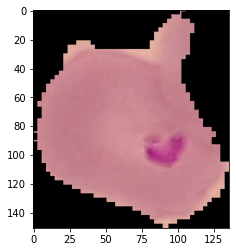

In [ ]:
plt.imshow(plt.imread(para_cell))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [ ]:
x=Flatten()(basic_vgg.output)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(1,activation='sigmoid')(x)

In [ ]:
model=tensorflow.keras.Model(basic_vgg.input,x)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 130, 130, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 130, 130, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 130, 130, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 65, 65, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 65, 65, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 65, 65, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
hist=model.fit(training_set,steps_per_epoch=10,epochs=5)

Epoch 1/5
10/10 [==============================] - 43s 4s/step - loss: 0.8150 - accuracy: 0.6438
Epoch 2/5
10/10 [==============================] - 45s 5s/step - loss: 0.5553 - accuracy: 0.7344
Epoch 3/5
10/10 [==============================] - 45s 4s/step - loss: 0.4211 - accuracy: 0.8062
Epoch 4/5
10/10 [==============================] - 45s 4s/step - loss: 0.3270 - accuracy: 0.8562
Epoch 5/5
10/10 [==============================] - 41s 4s/step - loss: 0.3254 - accuracy: 0.8531


In [ ]:
print(model.evaluate(x=testing_set))

217/217 [==============================] - 59s 271ms/step - loss: 0.2502 - accuracy: 0.9042
[0.25020891427993774, 0.9042307734489441]


In [ ]:
model.save("cell.h5")

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 5.0 MB/s 
     |████████████████████████████████| 4.7 MB 44.1 MB/s 
     |████████████████████████████████| 237 kB 70.9 MB/s 
     |████████████████████████████████| 182 kB 68.6 MB/s 
     |████████████████████████████████| 164 kB 70.7 MB/s 
     |████████████████████████████████| 78 kB 8.0 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 51 kB 7.1 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=7937af03bb7fc9340bf7bc0c6b97b52feaf835e028be5edc89acd3ba4e4f4ece
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image, ImageOps
st.write("""
          #Cell Classification
          """
          )
upload_file = st.sidebar.file_uploader("Upload Cell Images", type="png")
Generate_pred=st.sidebar.button("Predict")
model=tf.keras.models.load_model('cell.h5')
def import_n_pred(image_data, model):
    size = (130,130)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    img = np.asarray(image)
    reshape=img[np.newaxis,...]
    pred = model.predict(reshape)
    return pred
if Generate_pred:
    image=Image.open(upload_file)
    with st.beta_expander('Cell Image', expanded = True):
        st.image(image, use_column_width=True)
    pred=import_n_pred(image, model)
    labels = ['Parasitized', 'Uninfected']
    st.title("Prediction of image is {}".format(labels[np.argmax(pred)]))

Writing app.py


In [ ]:
!pip install pyngrok==4.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15983 sha256=b9398286937a6b7c9a9577414c9f3fe5693552a70e9807d4a91aad83e2e585e7
  Stored in directory: /root/.cache/pip/wheels/b1/d9/12/045a042fee3127dc40ba6f5df2798aa2df38c414bf533ca765
Successfully built pyngrok


In [ ]:
!ngrok authtoken 2GNmM32eRAYZ7KxfPYw35f45JeD_2P6iRHpX7kEovQALwd4it

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port='8501')
url

'http://707e-34-134-222-96.ngrok.io'

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2022-10-21 13:31:45--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 52.202.168.65, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  37.8MB/s    in 0.3s    

2022-10-21 13:31:45 (37.8 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://707e-34-134-222-96.ngrok.io


In [ ]:
!streamlit run /content/app.py

2022-10-21 13:32:12.652 INFO    numexpr.utils: NumExpr defaulting to 2 threads.





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.134.222.96:8501

2022-10-21 13:34:53.648309: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-10-21 13:35:11.624 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 562, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 23, in <module>
    pred=import_n_pred(image, model)
  File "/content/app.py", line 17, in import_n_pred
    pred = model.predict(reshape)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_filee5vlm73p.py", line 15, in tf__predict_functio